In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as dates
%matplotlib inline
pd.set_option('display.max_columns', None)

In [3]:
properties_2016 = pd.read_csv("properties_2016.csv",low_memory=False)

In [6]:
train_2016 = pd.read_csv("train_2016.csv")

In [5]:
print(train_2016)

       parcelid  logerror transactiondate
0      11016594    0.0276      2016-01-01
1      14366692   -0.1684      2016-01-01
2      12098116   -0.0040      2016-01-01
3      12643413    0.0218      2016-01-02
4      14432541   -0.0050      2016-01-02
...         ...       ...             ...
90270  10774160   -0.0356      2016-12-30
90271  12046695    0.0070      2016-12-30
90272  12995401   -0.2679      2016-12-30
90273  11402105    0.0602      2016-12-30
90274  12566293    0.4207      2016-12-30

[90275 rows x 3 columns]


In [6]:
print(properties_2016)

          parcelid  airconditioningtypeid  architecturalstyletypeid  \
0         10754147                    NaN                       NaN   
1         10759547                    NaN                       NaN   
2         10843547                    NaN                       NaN   
3         10859147                    NaN                       NaN   
4         10879947                    NaN                       NaN   
...            ...                    ...                       ...   
2985212  168176230                    NaN                       NaN   
2985213   14273630                    NaN                       NaN   
2985214  168040630                    NaN                       NaN   
2985215  168040830                    NaN                       NaN   
2985216  168040430                    NaN                       NaN   

         basementsqft  bathroomcnt  bedroomcnt  buildingclasstypeid  \
0                 NaN          0.0         0.0                  NaN   
1    

# Merging the 2 datasets

In [7]:
data_2016 = pd.merge(properties_2016,train_2016,how='inner',on='parcelid')

In [8]:
data_2016.shape

(90275, 60)

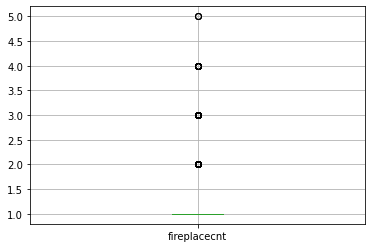

In [62]:
boxplot = data_2016.boxplot(column = ['fireplacecnt']) 

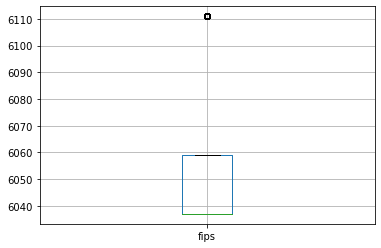

In [60]:
boxplot = data_2016.boxplot(column = ['fips']) 

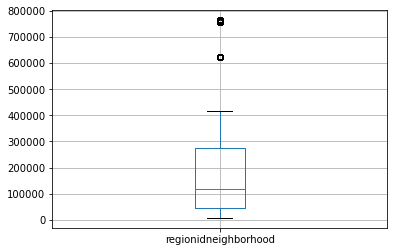

In [61]:
boxplot = data_2016.boxplot(column = ['regionidneighborhood']) 

In [17]:
print(data_2016.dtypes)

parcelid                          int64
airconditioningtypeid           float64
architecturalstyletypeid        float64
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingclasstypeid             float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
decktypeid                      float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fips                            float64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
hashottuborspa                   object
heatingorsystemtypeid           float64
latitude                        float64


# Percent of missing values in all columns

In [8]:
data_2016.isnull().sum() / data_2016.shape[0] * 100.00

parcelid                         0.000000
airconditioningtypeid           68.118527
architecturalstyletypeid        99.710883
basementsqft                    99.952368
bathroomcnt                      0.000000
bedroomcnt                       0.000000
buildingclasstypeid             99.982276
buildingqualitytypeid           36.456383
calculatedbathnbr                1.309333
decktypeid                      99.271116
finishedfloor1squarefeet        92.405428
calculatedfinishedsquarefeet     0.732207
finishedsquarefeet12             5.183052
finishedsquarefeet13            99.963445
finishedsquarefeet15            96.052063
finishedsquarefeet50            92.405428
finishedsquarefeet6             99.533647
fips                             0.000000
fireplacecnt                    89.358073
fullbathcnt                      1.309333
garagecarcnt                    66.837995
garagetotalsqft                 66.837995
hashottuborspa                  97.380227
heatingorsystemtypeid           37

In [9]:
data_2016_clean = data_2016.drop(columns=['taxdelinquencyyear','taxdelinquencyflag','fireplaceflag','yardbuildingsqft26','yardbuildingsqft17','typeconstructiontypeid','storytypeid','pooltypeid2','pooltypeid10','poolsizesum','finishedsquarefeet6','finishedsquarefeet50','finishedsquarefeet15','finishedsquarefeet13','finishedfloor1squarefeet','decktypeid','buildingclasstypeid','basementsqft','architecturalstyletypeid'])

In [17]:
data_2016_clean.head()

,parcelid,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,threequarterbathnbr,unitcnt,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate
0,17073783,NaN,2.5,3.0,NaN,2.5,1264.0,1264.0,6111.0,NaN,2.0,2.0,0.0,NaN,NaN,34303597.0,-119287236.0,1735.0,NaN,NaN,1128,265.0,NaN,6.111002e+07,34543.0,2061.0,NaN,97081.0,5.0,1.0,NaN,1986.0,2.0,115087.0,191811.0,2015.0,76724.0,2015.06,6.111002e+13,0.0953,2016-01-27
1,17088994,NaN,1.0,2.0,NaN,1.0,777.0,777.0,6111.0,NaN,1.0,1.0,0.0,NaN,NaN,34272866.0,-119198911.0,NaN,NaN,NaN,1129,266.0,NaN,6.111002e+07,34543.0,2061.0,NaN,97083.0,4.0,NaN,NaN,1990.0,1.0,143809.0,239679.0,2015.0,95870.0,2581.30,6.111002e+13,0.0198,2016-03-30
2,17100444,NaN,2.0,3.0,NaN,2.0,1101.0,1101.0,6111.0,NaN,2.0,2.0,441.0,NaN,NaN,34340801.0,-119079610.0,6569.0,NaN,NaN,1111,261.0,NaN,6.111001e+07,26965.0,2061.0,NaN,97113.0,5.0,NaN,NaN,1956.0,1.0,33619.0,47853.0,2015.0,14234.0,591.64,6.111001e+13,0.0060,2016-05-27
3,17102429,NaN,1.5,2.0,NaN,1.5,1554.0,1554.0,6111.0,1.0,1.0,2.0,460.0,NaN,NaN,34354313.0,-119076405.0,7400.0,NaN,NaN,1110,261.0,NaN,6.111001e+07,26965.0,2061.0,NaN,97113.0,5.0,1.0,NaN,1965.0,1.0,45609.0,62914.0,2015.0,17305.0,682.78,6.111001e+13,-0.0566,2016-06-07
4,17109604,NaN,2.5,4.0,NaN,2.5,2415.0,2415.0,6111.0,1.0,2.0,2.0,665.0,NaN,NaN,34266578.0,-119165392.0,6326.0,NaN,NaN,1111,261.0,NaN,6.111001e+07,34543.0,2061.0,NaN,97084.0,8.0,1.0,NaN,1984.0,2.0,277000.0,554000.0,2015.0,277000.0,5886.92,6.111001e+13,0.0573,2016-08-08


# Separating Categorical Data

In [10]:
data_2016_categorical = data_2016_clean[["parcelid","hashottuborspa","propertycountylandusecode","propertyzoningdesc","transactiondate"]]

# Separating Numerical Data

In [11]:
data_2016_numeric = data_2016_clean.drop(columns=["hashottuborspa","propertycountylandusecode","propertyzoningdesc","transactiondate"])

In [12]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="median")
print(imp.fit_transform(data_2016_numeric))

[[ 1.70737830e+07  1.00000000e+00  2.50000000e+00 ...  2.01506000e+03
   6.11100220e+13  9.53000000e-02]
 [ 1.70889940e+07  1.00000000e+00  1.00000000e+00 ...  2.58130000e+03
   6.11100150e+13  1.98000000e-02]
 [ 1.71004440e+07  1.00000000e+00  2.00000000e+00 ...  5.91640000e+02
   6.11100070e+13  6.00000000e-03]
 ...
 [ 1.20102480e+07  1.00000000e+00  2.00000000e+00 ...  5.07041000e+03
   6.03719051e+13  8.43000000e-02]
 [ 1.43109050e+07  1.00000000e+00  2.50000000e+00 ...  1.25083000e+04
   6.03761495e+13 -5.00000000e-03]
 [ 1.46366090e+07  1.00000000e+00  2.50000000e+00 ...  5.47012000e+03
   6.03761495e+13  1.29000000e-02]]


# Trying KNN

In [32]:
from sklearn.impute import KNNImputer
# Impute
imputer_orig = KNNImputer(n_neighbors=3)
imputed_orig = imputer_orig.fit_transform(data_2016_numeric)
# Convert to DataFrames
imputed_orig = pd.DataFrame(data=imputed_orig, columns=data_2016_numeric.columns)

In [33]:
imputed_orig.head()

,parcelid,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,pooltypeid7,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,threequarterbathnbr,unitcnt,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror
0,17073783.0,1.0,2.5,3.0,6.0,2.5,1264.0,1264.0,6111.0,1.0,2.0,2.0,0.0,10.666667,34303597.0,-119287236.0,1735.000000,1.0,1.0,265.0,6.111002e+07,34543.0,2061.0,285466.666667,97081.0,5.0,1.0,2.666667,1986.0,2.0,115087.0,191811.0,2015.0,76724.0,2015.06,6.111002e+13,0.0953
1,17088994.0,1.0,1.0,2.0,5.0,1.0,777.0,777.0,6111.0,1.0,1.0,1.0,0.0,10.666667,34272866.0,-119198911.0,11912.666667,1.0,1.0,266.0,6.111002e+07,34543.0,2061.0,331531.333333,97083.0,4.0,1.0,2.333333,1990.0,1.0,143809.0,239679.0,2015.0,95870.0,2581.30,6.111002e+13,0.0198
2,17100444.0,1.0,2.0,3.0,5.0,2.0,1101.0,1101.0,6111.0,1.0,2.0,2.0,441.0,10.666667,34340801.0,-119079610.0,6569.000000,1.0,1.0,261.0,6.111001e+07,26965.0,2061.0,285466.666667,97113.0,5.0,1.0,3.666667,1956.0,1.0,33619.0,47853.0,2015.0,14234.0,591.64,6.111001e+13,0.0060
3,17102429.0,1.0,1.5,2.0,5.0,1.5,1554.0,1554.0,6111.0,1.0,1.0,2.0,460.0,10.666667,34354313.0,-119076405.0,7400.000000,1.0,1.0,261.0,6.111001e+07,26965.0,2061.0,524197.333333,97113.0,5.0,1.0,2.666667,1965.0,1.0,45609.0,62914.0,2015.0,17305.0,682.78,6.111001e+13,-0.0566
4,17109604.0,1.0,2.5,4.0,5.0,2.5,2415.0,2415.0,6111.0,1.0,2.0,2.0,665.0,10.666667,34266578.0,-119165392.0,6326.000000,1.0,1.0,261.0,6.111001e+07,34543.0,2061.0,761221.000000,97084.0,8.0,1.0,2.333333,1984.0,2.0,277000.0,554000.0,2015.0,277000.0,5886.92,6.111001e+13,0.0573


# Trying Scaling and KNN

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_2016_scaled = scaler.fit_transform(data_2016_numeric)
data_2016_scaled = pd.DataFrame(data=data_2016_scaled, columns=data_2016_numeric.columns)
data_2016_scaled.head()
imputer_scaled = KNNImputer(n_neighbors=3)
imputed_scaled = imputer_scaled.fit_transform(data_2016_scaled)
imputed_scaled = pd.DataFrame(data=imputed_scaled, columns=data_2016_numeric.columns)
imputed_scaled = scaler.inverse_transform(imputed_scaled)
imputed_scaled = pd.DataFrame(data=imputed_scaled, columns=data_2016_numeric.columns)

In [38]:
imputed_scaled.head()

,parcelid,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,pooltypeid7,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,threequarterbathnbr,unitcnt,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror
0,17073783.0,13.000000,2.5,3.0,6.0,2.5,1264.0,1264.0,6111.0,1.0,2.0,2.0,0.0,12.0,34303597.0,-119287236.0,1735.000000,1.0,1.0,265.0,6.111002e+07,34543.0,2061.0,214939.000000,97081.0,5.0,1.0,2.0,1986.0,2.0,115087.0,191811.0,2015.0,76724.0,2015.06,6.111002e+13,0.0953
1,17088994.0,5.000000,1.0,2.0,4.0,1.0,777.0,777.0,6111.0,1.0,1.0,1.0,0.0,12.0,34272866.0,-119198911.0,1451.333333,1.0,1.0,266.0,6.111002e+07,34543.0,2061.0,552523.666667,97083.0,4.0,1.0,2.0,1990.0,1.0,143809.0,239679.0,2015.0,95870.0,2581.30,6.111002e+13,0.0198
2,17100444.0,6.333333,2.0,3.0,5.0,2.0,1101.0,1101.0,6111.0,1.0,2.0,2.0,441.0,12.0,34340801.0,-119079610.0,6569.000000,1.0,1.0,261.0,6.111001e+07,26965.0,2061.0,761055.000000,97113.0,5.0,1.0,2.0,1956.0,1.0,33619.0,47853.0,2015.0,14234.0,591.64,6.111001e+13,0.0060
3,17102429.0,7.666667,1.5,2.0,5.0,1.5,1554.0,1554.0,6111.0,1.0,1.0,2.0,460.0,12.0,34354313.0,-119076405.0,7400.000000,1.0,1.0,261.0,6.111001e+07,26965.0,2061.0,514977.666667,97113.0,5.0,1.0,2.0,1965.0,1.0,45609.0,62914.0,2015.0,17305.0,682.78,6.111001e+13,-0.0566
4,17109604.0,13.000000,2.5,4.0,6.0,2.5,2415.0,2415.0,6111.0,1.0,2.0,2.0,665.0,12.0,34266578.0,-119165392.0,6326.000000,1.0,1.0,261.0,6.111001e+07,34543.0,2061.0,515610.000000,97084.0,8.0,1.0,2.0,1984.0,2.0,277000.0,554000.0,2015.0,277000.0,5886.92,6.111001e+13,0.0573


In [44]:
data_2016_categorical.head()

,hashottuborspa,propertycountylandusecode,propertyzoningdesc,transactiondate
0,NaN,1128,NaN,2016-01-27
1,NaN,1129,NaN,2016-03-30
2,NaN,1111,NaN,2016-05-27
3,NaN,1110,NaN,2016-06-07
4,NaN,1111,NaN,2016-08-08


# Imputing data with Most Frequent values

In [13]:
from sklearn.impute import SimpleImputer
imputer_categorical = SimpleImputer(strategy='most_frequent') 
# transform the dataset
data_2016_categorical_imputed= pd.DataFrame(imputer_categorical.fit_transform(data_2016_categorical),columns=list(data_2016_categorical))

# Imputing data with Median values

In [14]:
imp_numeric = SimpleImputer(strategy="median")
data_2016_numeric_imputed = pd.DataFrame(imp_numeric.fit_transform(data_2016_numeric),columns=list(data_2016_numeric))

In [85]:
data_2016_numeric_imputed.head()

,parcelid,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,pooltypeid7,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,threequarterbathnbr,unitcnt,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror
0,17073783.0,1.0,2.5,3.0,7.0,2.5,1264.0,1264.0,6111.0,1.0,2.0,2.0,0.0,2.0,34303597.0,-119287236.0,1735.0,1.0,1.0,265.0,6.111002e+07,34543.0,2061.0,118887.0,97081.0,5.0,1.0,1.0,1986.0,2.0,115087.0,191811.0,2015.0,76724.0,2015.06,6.111002e+13,0.0953
1,17088994.0,1.0,1.0,2.0,7.0,1.0,777.0,777.0,6111.0,1.0,1.0,1.0,0.0,2.0,34272866.0,-119198911.0,7200.0,1.0,1.0,266.0,6.111002e+07,34543.0,2061.0,118887.0,97083.0,4.0,1.0,1.0,1990.0,1.0,143809.0,239679.0,2015.0,95870.0,2581.30,6.111002e+13,0.0198
2,17100444.0,1.0,2.0,3.0,7.0,2.0,1101.0,1101.0,6111.0,1.0,2.0,2.0,441.0,2.0,34340801.0,-119079610.0,6569.0,1.0,1.0,261.0,6.111001e+07,26965.0,2061.0,118887.0,97113.0,5.0,1.0,1.0,1956.0,1.0,33619.0,47853.0,2015.0,14234.0,591.64,6.111001e+13,0.0060
3,17102429.0,1.0,1.5,2.0,7.0,1.5,1554.0,1554.0,6111.0,1.0,1.0,2.0,460.0,2.0,34354313.0,-119076405.0,7400.0,1.0,1.0,261.0,6.111001e+07,26965.0,2061.0,118887.0,97113.0,5.0,1.0,1.0,1965.0,1.0,45609.0,62914.0,2015.0,17305.0,682.78,6.111001e+13,-0.0566
4,17109604.0,1.0,2.5,4.0,7.0,2.5,2415.0,2415.0,6111.0,1.0,2.0,2.0,665.0,2.0,34266578.0,-119165392.0,6326.0,1.0,1.0,261.0,6.111001e+07,34543.0,2061.0,118887.0,97084.0,8.0,1.0,1.0,1984.0,2.0,277000.0,554000.0,2015.0,277000.0,5886.92,6.111001e+13,0.0573


# Correlation Matrix

<AxesSubplot:>

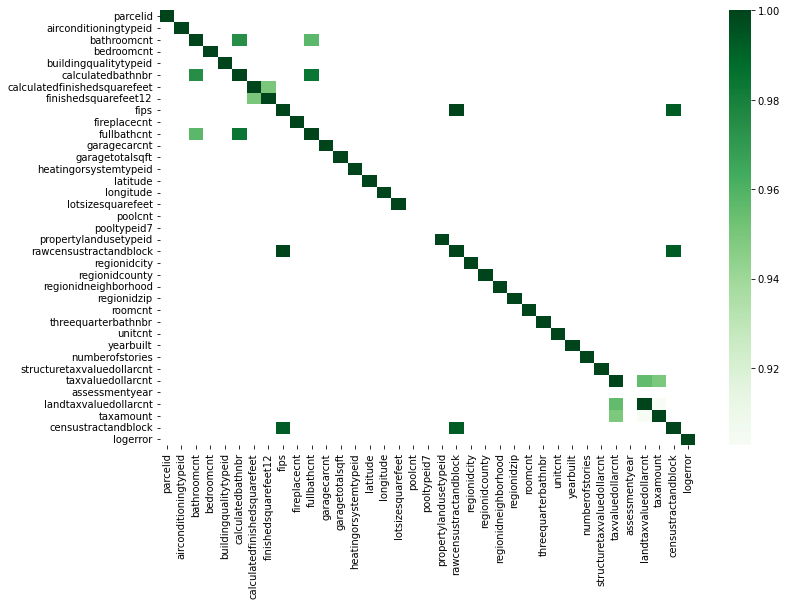

In [15]:
import seaborn as sn
corrMatrix = data_2016_numeric_imputed.corr()
kot = corrMatrix[corrMatrix>=.9]
plt.figure(figsize=(12,8))
sn.heatmap(kot, cmap="Greens")

In [16]:
data_2016_numeric_imputed = data_2016_numeric_imputed.drop(columns = ["fips","censustractandblock"])

<AxesSubplot:>

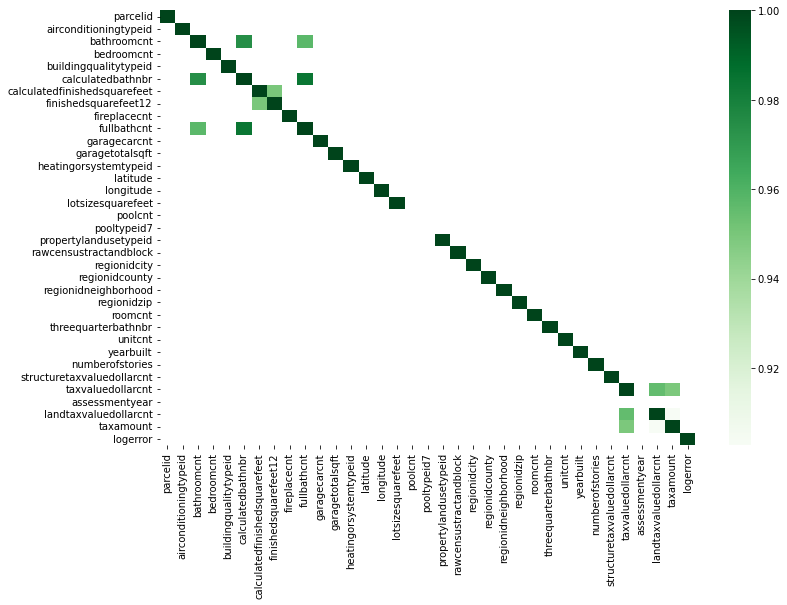

In [17]:
import seaborn as sn
corrMatrix = data_2016_numeric_imputed.corr()
kot = corrMatrix[corrMatrix>=.9]
plt.figure(figsize=(12,8))
sn.heatmap(kot, cmap="Greens")

In [82]:
data_2016_categorical_imputed.head()

,parcelid,hashottuborspa,propertycountylandusecode,propertyzoningdesc,transactiondate
0,17073783,True,1128,LAR1,2016-01-27
1,17088994,True,1129,LAR1,2016-03-30
2,17100444,True,1111,LAR1,2016-05-27
3,17102429,True,1110,LAR1,2016-06-07
4,17109604,True,1111,LAR1,2016-08-08


# One Hot Encoding

In [18]:
from sklearn.preprocessing import LabelEncoder
hashottuborspa_encoded = LabelEncoder()
propertycountylandusecode_encoded = LabelEncoder()
propertyzoningdesc_encoded = LabelEncoder()
data_2016_categorical_imputed['hashottuborspa_encoded'] = hashottuborspa_encoded.fit_transform(data_2016_categorical_imputed.hashottuborspa)
data_2016_categorical_imputed['propertycountylandusecode_encoded'] = propertycountylandusecode_encoded.fit_transform(data_2016_categorical_imputed.propertycountylandusecode)
data_2016_categorical_imputed['propertyzoningdesc_encoded'] = propertyzoningdesc_encoded.fit_transform(data_2016_categorical_imputed.propertyzoningdesc)

In [97]:
data_2016_categorical_imputed.head()

,parcelid,hashottuborspa,propertycountylandusecode,propertyzoningdesc,transactiondate,hashottuborspa_encoded,propertycountylandusecode_encoded,propertyzoningdesc_encoded
0,17073783,True,1128,LAR1,2016-01-27,0,54,609
1,17088994,True,1129,LAR1,2016-03-30,0,55,609
2,17100444,True,1111,LAR1,2016-05-27,0,50,609
3,17102429,True,1110,LAR1,2016-06-07,0,49,609
4,17109604,True,1111,LAR1,2016-08-08,0,50,609


In [19]:
from sklearn.preprocessing import OneHotEncoder
hhts_ohe = OneHotEncoder()
pclc_ohe = OneHotEncoder()
pzd_ohe = OneHotEncoder()
hhts = hhts_ohe.fit_transform(data_2016_categorical_imputed.hashottuborspa_encoded.values.reshape(-1,1)).toarray()
pclc = pclc_ohe.fit_transform(data_2016_categorical_imputed.propertycountylandusecode_encoded.values.reshape(-1,1)).toarray()
pzd = pzd_ohe.fit_transform(data_2016_categorical_imputed.propertyzoningdesc_encoded.values.reshape(-1,1)).toarray()

In [20]:
dfOneHot = pd.DataFrame(hhts, columns = ["hhts_"+str(int(i)) for i in range(hhts.shape[1])])
data_2016_categorical_imputed = pd.concat([data_2016_categorical_imputed, dfOneHot], axis=1)
dfOneHot = pd.DataFrame(pclc, columns = ["pclc_"+str(int(i)) for i in range(pclc.shape[1])])
data_2016_categorical_imputed = pd.concat([data_2016_categorical_imputed, dfOneHot], axis=1)
dfOneHot = pd.DataFrame(pzd, columns = ["pzd_"+str(int(i)) for i in range(pzd.shape[1])])
data_2016_categorical_imputed = pd.concat([data_2016_categorical_imputed, dfOneHot], axis=1)

In [105]:
data_2016_categorical_imputed.head()

parcelid hashottuborspa propertycountylandusecode propertyzoningdesc  \
0  17073783           True                      1128               LAR1   
1  17088994           True                      1129               LAR1   
2  17100444           True                      1111               LAR1   
3  17102429           True                      1110               LAR1   
4  17109604           True                      1111               LAR1   

  transactiondate  hashottuborspa_encoded  propertycountylandusecode_encoded  \
0      2016-01-27                       0                                 54   
1      2016-03-30                       0                                 55   
2      2016-05-27                       0                                 50   
3      2016-06-07                       0                                 49   
4      2016-08-08                       0                                 50   

   propertyzoningdesc_encoded  hhts_0  pclc_0  pclc_1  pclc_2  pclc_3  pclc_4  \
0                         609     1.0     0.0     0.0     0.0     0.0     0.0   
1                         609     1.0     0.0     0.0     0.0     0.0     0.0   
2                         609     1.0     0.0     0.0     0.0     0.0     0.0   
3                         609     1.0     0.0     0.0     0.0     0.0     0.0   
4                         609     1.0     0.0     0.0     0.0     0.0     0.0   

   pclc_5  pclc_6  pclc_7  pclc_8  pclc_9  pclc_10  pclc_11  pclc_12  pclc_13  \
0     0.0     0.0     0.0     0.0     0.0      0.0      0.0      0.0      0.0   
1     0.0     0.0     0.0     0.0     0.0      0.0      0.0      0.0      0.0   
2     0.0     0.0     0.0     0.0     0.0      0.0      0.0      0.0      0.0   
3     0.0     0.0     0.0     0.0     0.0      0.0      0.0      0.0      0.0   
4     0.0     0.0     0.0     0.0     0.0      0.0      0.0      0.0      0.0   

   pclc_14  pclc_15  pclc_16  pclc_17  pclc_18  pclc_19  pclc_20  pclc_21  \
0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

   pclc_22  pclc_23  pclc_24  pclc_25  pclc_26  pclc_27  pclc_28  pclc_29  \
0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

   pclc_30  pclc_31  pclc_32  pclc_33  pclc_34  pclc_35  pclc_36  pclc_37  \
0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

   pclc_38  pclc_39  pclc_40  pclc_41  pclc_42  pclc_43  pclc_44  pclc_45  \
0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

   pclc_46  pclc_47  pclc_48  pclc_49  pclc_50  pclc_51  pclc_52  pclc_53  \
0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2      0.0    

In [22]:
data_2016_cat_transformed = data_2016_categorical_imputed[["parcelid","transactiondate","hashottuborspa_encoded","propertycountylandusecode_encoded","propertyzoningdesc_encoded"]]

# Merging numerical and categorical

In [23]:
data_2016_final = pd.merge(data_2016_numeric_imputed,data_2016_cat_transformed,how='inner',on='parcelid')

In [24]:
data_2016_x = data_2016_final.drop(columns=["logerror","transactiondate","parcelid"])

In [25]:
data_2016_y = data_2016_final["logerror"]

In [22]:
data_2016_x.head()

,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,pooltypeid7,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,threequarterbathnbr,unitcnt,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,hashottuborspa_encoded,propertycountylandusecode_encoded,propertycountylandusecode_encoded
0,1.0,2.5,3.0,7.0,2.5,1264.0,1264.0,6111.0,1.0,2.0,2.0,0.0,2.0,34303597.0,-119287236.0,1735.0,1.0,1.0,265.0,6.111002e+07,34543.0,2061.0,118887.0,97081.0,5.0,1.0,1.0,1986.0,2.0,115087.0,191811.0,2015.0,76724.0,2015.06,6.111002e+13,0,54,54
1,1.0,1.0,2.0,7.0,1.0,777.0,777.0,6111.0,1.0,1.0,1.0,0.0,2.0,34272866.0,-119198911.0,7200.0,1.0,1.0,266.0,6.111002e+07,34543.0,2061.0,118887.0,97083.0,4.0,1.0,1.0,1990.0,1.0,143809.0,239679.0,2015.0,95870.0,2581.30,6.111002e+13,0,55,55
2,1.0,2.0,3.0,7.0,2.0,1101.0,1101.0,6111.0,1.0,2.0,2.0,441.0,2.0,34340801.0,-119079610.0,6569.0,1.0,1.0,261.0,6.111001e+07,26965.0,2061.0,118887.0,97113.0,5.0,1.0,1.0,1956.0,1.0,33619.0,47853.0,2015.0,14234.0,591.64,6.111001e+13,0,50,50
3,1.0,1.5,2.0,7.0,1.5,1554.0,1554.0,6111.0,1.0,1.0,2.0,460.0,2.0,34354313.0,-119076405.0,7400.0,1.0,1.0,261.0,6.111001e+07,26965.0,2061.0,118887.0,97113.0,5.0,1.0,1.0,1965.0,1.0,45609.0,62914.0,2015.0,17305.0,682.78,6.111001e+13,0,49,49
4,1.0,2.5,4.0,7.0,2.5,2415.0,2415.0,6111.0,1.0,2.0,2.0,665.0,2.0,34266578.0,-119165392.0,6326.0,1.0,1.0,261.0,6.111001e+07,34543.0,2061.0,118887.0,97084.0,8.0,1.0,1.0,1984.0,2.0,277000.0,554000.0,2015.0,277000.0,5886.92,6.111001e+13,0,50,50


In [65]:
data_2016_y.head()

0    0.0953
1    0.0198
2    0.0060
3   -0.0566
4    0.0573
Name: logerror, dtype: float64

# Separating Test and Training data

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_2016_x, data_2016_y, test_size=0.51, random_state=42)

# Trying XGBoost

In [ ]:
# import xgboost as xgb
# xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)
# xgb_model.fit(X_train, y_train)
# y_pred = xgb_model.predict(X_train)
# mse=mean_squared_error(y_train, y_pred)
# print(np.sqrt(mse))

In [66]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
model = LGBMRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -0.069 (0.002)


# Trying Regressor Algorithms

In [29]:
from sklearn import linear_model
from sklearn import svm
from sklearn.metrics import mean_absolute_error

classifiers = [
    svm.SVR(),
    linear_model.SGDRegressor(),
    linear_model.BayesianRidge(),
    linear_model.LassoLars(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.TheilSenRegressor(),
    linear_model.LinearRegression()]
for item in classifiers:
    print(item)
    clf = item
    clf_model = clf.fit(X_train, y_train)
    y_pred = clf_model.predict(X_test)
    print(mean_absolute_error(y_test, y_pred))

SVR()
0.0696083650192237
SGDRegressor()
1.9577926809188174e+24
BayesianRidge()
0.06968807316814352
LassoLars()
0.06948943865780931
ARDRegression()
0.06948943865780931
PassiveAggressiveRegressor()
0.09094319117795906
TheilSenRegressor(max_subpopulation=10000)
0.07467472928476712
LinearRegression()
0.06981630965277341


# Trying KNeighborsRegressor

In [30]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=3)
knn_value = knn_model.fit(X_train, y_train)
y_pred = knn_value.predict(X_test)
print(mean_absolute_error(y_test, y_pred))

0.09057597955337997


# Choosing ARD Regression

In [64]:
final_model = linear_model.ARDRegression()
ard_model = final_model.fit(X_train, y_train)
y_pred = ard_model.predict(X_test)
print(mean_absolute_error(y_test, y_pred))

0.06948943865780931


In [67]:
import pickle
pickle.dump(ard_model,open("zillow.model","wb"))